##### Copyright 2025 Google LLC.

# Physical Reasoning (The "What" and "Why")

Robotics is more than just identifying objects; it's about understanding their **physical properties**.

A robot needs to know if an object is too heavy to lift, if it's fragile enough to require a gentle grip, or if a container is empty and ready for an item. By enabling the `thinking` parameter, Gemini can reason through these abstract concepts.

This notebook covers:
1.  **Payload Estimation:** Filtering objects based on hardware force limits.
2.  **Compliance & Fragility:** Adjusting grip strategy based on material properties.
3.  **Functional State Identification:** Reasoning about "empty" vs "occupied" spaces.
4.  **Analytical Reasoning:** Chain-of-thought counting in complex scenes.

## 1. Setup & Initialization

In [ ]:
%pip install -U -q google-genai google-colab

In [ ]:
import os
import urllib.request
import textwrap
from PIL import Image

if not os.path.exists('robotics_utils.py'):
    url = "https://raw.githubusercontent.com/williamito/robotics-samples/refs/heads/main/robotics_utils.py"
    urllib.request.urlretrieve(url, 'robotics_utils.py')

import robotics_utils as utils
utils.download_assets()

In [ ]:
from google.colab import userdata
from google import genai
from google.genai import types

GOOGLE_API_KEY = userdata.get("GOOGLE_API_KEY")
client = genai.Client(api_key=GOOGLE_API_KEY)

### About "Robotics Context" Sidebars
Throughout this notebook, you will see sections titled **🤖 Robotics Context**. These are designed to bridge the gap between the AI model's output (like pixel coordinates or text) and the physical reality of a robot (like motor commands and coordinate transforms). They provide key concepts and search terms to help you connect these examples to real-world robotics engineering.

## 2. Part 1: Hardware Limits (Payload)

### Example: Force Estimation
The model infers mass properties from visual cues and material types.

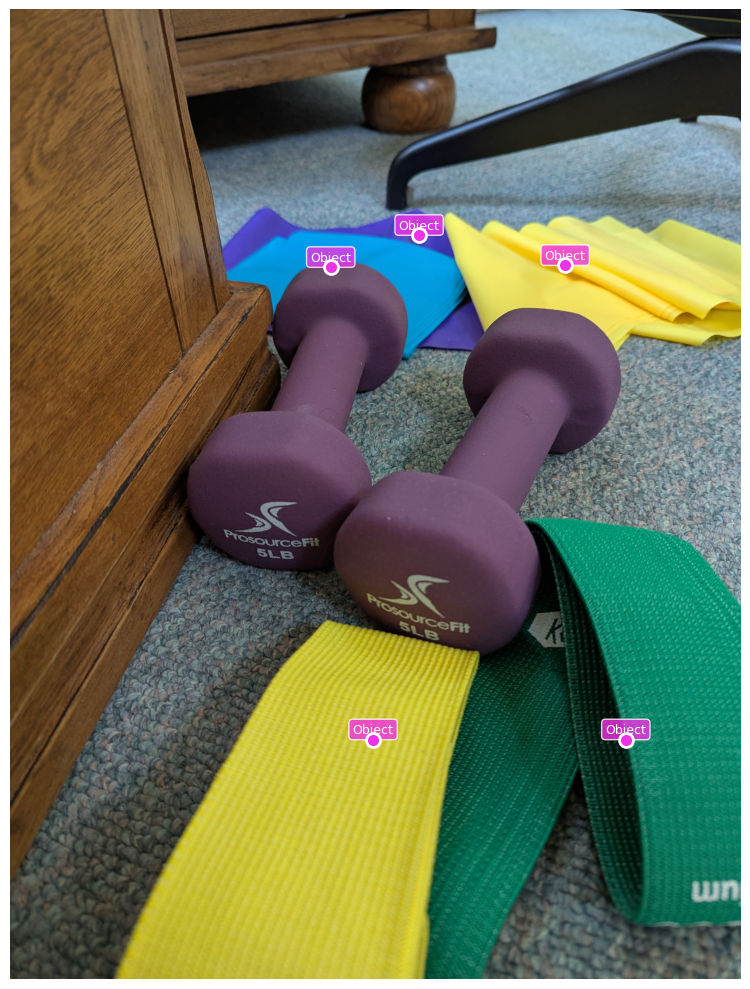

In [ ]:
img = Image.open("weights.jpeg")
prompt = "I am a robot with a payload limit of 3LBs. Point to all objects I can safely pick up."

response = utils.query_gemini(client, img, prompt, thinking=True)
utils.visualize_detections(img, response)

## 3. Part 2: Functional Reasoning

### Example: State Identification (Empty vs Full)
Robots must distinguish between available workspace and occupied space.

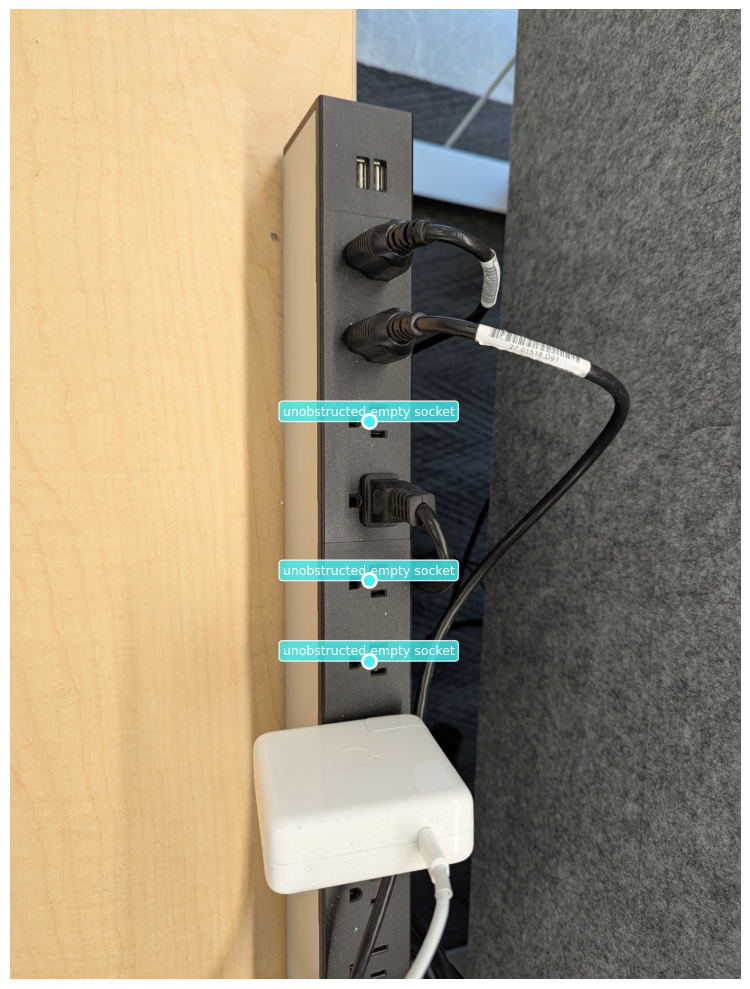

In [ ]:
img_sockets = Image.open("sockets.jpeg")
prompt = "Point to the unobstructed empty sockets."

response = utils.query_gemini(client, img_sockets, prompt, thinking=True)
utils.visualize_detections(img_sockets, response)

### Example: Contextual Problem Solving
The model can map a human problem ("I need to blow my nose") to a physical solution.

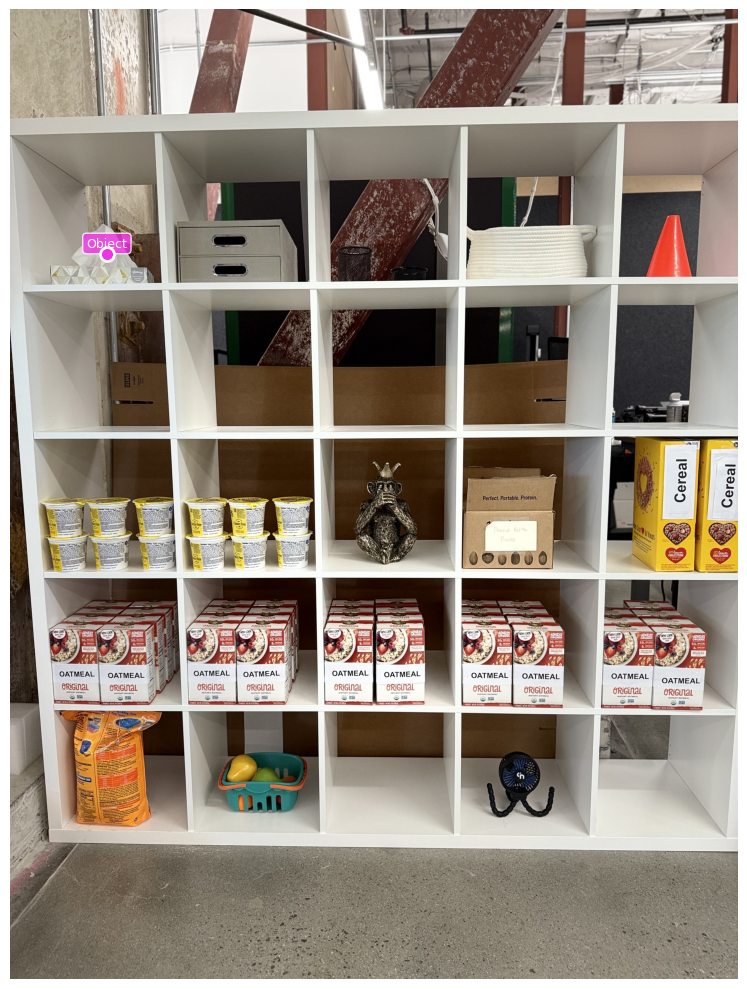

In [ ]:
img_shelf = Image.open("bookshelf.jpeg")
prompt = "'I need to blow my nose.' Find the cubby that can help."

response = utils.query_gemini(client, img_shelf, prompt)
utils.visualize_detections(img_shelf, response)

### Example: Manipulation Logic (Rearrangement)
Identify objects to move to change the state of the environment.

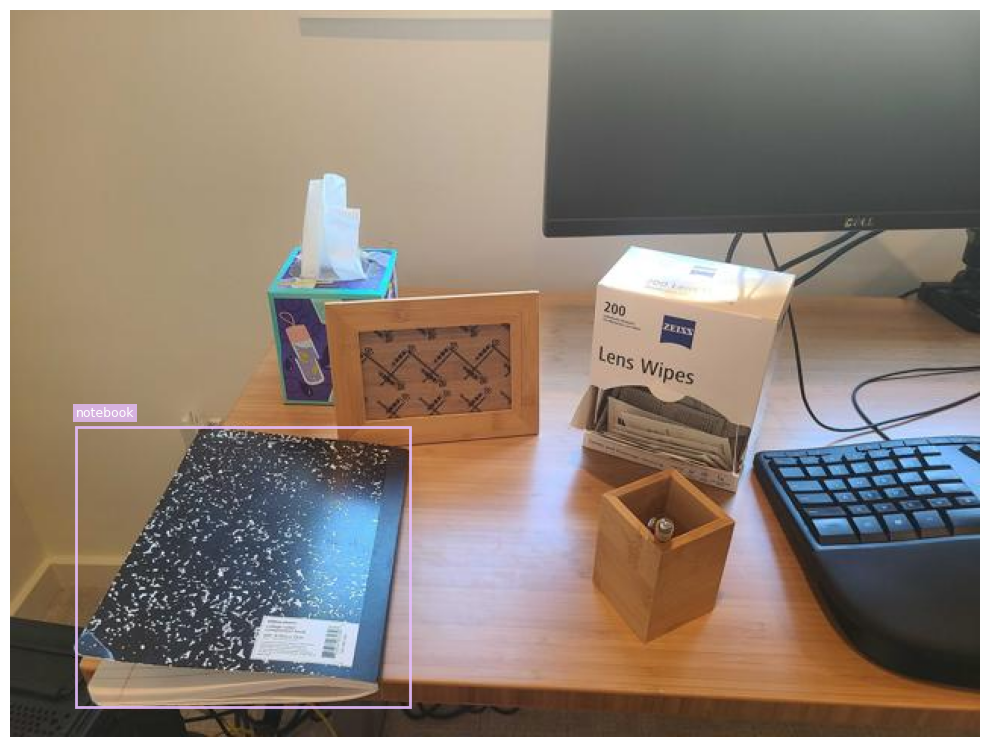

In [ ]:
img_space = Image.open("clear_space.png")
prompt = "Point to the object that I need to remove to make room for my laptop."

response = utils.query_gemini(client, img_space, prompt, thinking=True)
utils.visualize_detections(img_space, response)

### Example: Planning Reasoning (Orchestration)
Generate a step-by-step plan for a complex task like packing a lunch.

In [ ]:
img_lunch = Image.open("lunch.png")
prompt = "Explain how to pack the lunch box and lunch bag. Point to each object that you refer to."

response = utils.query_gemini(client, img_lunch, prompt, thinking=True)
utils.visualize_detections(img_lunch, response)

## 4. Part 3: Chain-of-Thought Counting

### Example: Analyzing Cluttered Containers
Enable reasoning to let the model "show its work" for complex counting tasks.

In [ ]:
img_cart = Image.open("cart.png")
prompt = "How many items are inside the cart basket? Share your reasoning step by step."

# We use json_mode=False to see the full reasoning text
response = utils.query_gemini(client, img_cart, prompt, thinking=True, json_mode=False)
print(response)

The image shows 8 items inside the cart basket.


## Summary

In this notebook, you've moved beyond simple object detection to **physical intelligence**. By leveraging the model's internal reasoning, you can build systems that adapt to the physical properties of the environment.

**See Also:**
*   **[Task Orchestration](./task_orchestration.ipynb):** Learn how to manage complex workflows and video analysis.
*   **[Spatial Awareness](./spatial_awareness.ipynb):** Learn how to locate the objects you reasoned about.